In [48]:
### ASSIGNMENT 1 ###
# QUESTION 2
# Efe Berk ERGULEC
''' Importing Libraries. I used them during my homework. '''
import operator
import math
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# Implementation of training number m, features x, epsilon eps, 
# query point q and prediction y. This is our simple function.
m = 100
x = np.random.rand(m,1)
eps = np.random.randn(m,1)
y = np.sin(2 * np.pi * x) + eps
x_bias = np.c_[np.ones((100,1)),x] # add x0=1 to each instance

In [50]:
# I add this part to compare difference between linear regression with predefined functions and Normal Equation.
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.25765465]), array([[-2.07906692]]))

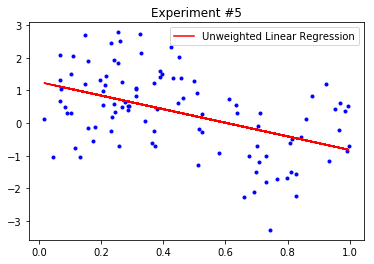

In [51]:
# Part I: Unweighted Linear Regression
# Theta=(X_T*X)^-1*X_T*y
def get_best_param(x, y):  
    X_transpose = x.T  
    best_params = np.linalg.inv(X_transpose.dot(x)).dot(X_transpose).dot(y)   
    return best_params # returns a list

X_bias = np.c_[np.ones((100, 1)),x] # set bias term to 1 for each sample 

theta = get_best_param(X_bias, y)  

y_pred = np.dot(X_bias,theta) # Defines θTx

plot.plot(x,y,'b.')
plot.plot(x, y_pred, color='r', label='Unweighted Linear Regression')
plot.legend()
plot.title('Experiment #5')
plot.show()

In [52]:
#Stochastic Gradient Descent
eta=0.1 #learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    for i in range(m):
        for j in range(len(theta)):
            theta[j]=theta[j]-eta*(theta.T.dot(x_bias[i])-y[i])*x_bias[i,j]
       
    
theta

array([[ 1.35318169],
       [-1.96864995]])

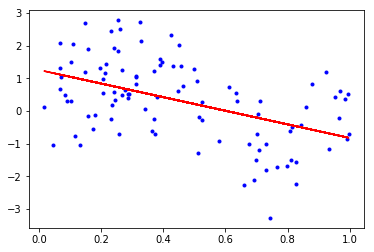

In [53]:
# Part 2: Import of weight function w, bandwidth parameter band.
w = [0 for i in range(m)]
band = 0.8
r = int(np.random.randint(m, size = 1))
q = X_bias[r][1]
mse = 0

for i in range(m):
    w[i] = float(np.exp(-(np.power(X_bias[i][1]-q,2))/(2 * band * band)))
    mse += (w[i] * np.power(y - y[i], 2))

mse = sum(mse)
mse = mse / m

model = LinearRegression()
model.fit(X_bias, y)
y_pred = model.predict(X_bias)

plot.plot(X_bias[:,1],y,'b.')
plot.plot(X_bias[:,1], y_pred, color='r')
plot.show()